In [96]:
library("openxlsx")
library("ggplot2")
library("stringr")
library("tidyr")
library("dplyr")

In [90]:
df <- read.xlsx(xlsxFile = "EsperancaVida.xlsx", sheet = 1, rows = c(9:70))
names(df)[1] <- "year"
names(df) <- str_replace_all(names(df), "\\.", " ")
names(df)[2:35] <- paste(names(df)[2:35], c(" (Total)"))
names(df)[36:69] <- paste(names(df)[36:69], c(" (Homens)"))
names(df)[70:103] <- paste(names(df)[70:103], c(" (Mulheres)"))
df <- df[c(1, 36:103)] %>%
  {pivot_longer(., all_of(names(.)[2:69]), names_to = "country", values_to = "esp_vida")} %>%
  transform(country_code = str_replace(country, " - .+", "")) %>%
  transform(type = str_match(country, "\\((\\w+)\\)$")) %>%
  transform(country_dn = str_replace(country, "\\((\\w+)\\)$", ""))

In [91]:
df

year,country,esp_vida,country_code,type.1,type.2,country_dn
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1960,UE27 (2020) - União Europeia 27 (desde 2020) (Homens),0.0,UE27 (2020),(Homens),Homens,UE27 (2020) - União Europeia 27 (desde 2020)
1960,UE28 - União Europeia (28 Países) (Homens),0.0,UE28,(Homens),Homens,UE28 - União Europeia (28 Países)
1960,ZE19 - Zona Euro (19 Países) (Homens),0.0,ZE19,(Homens),Homens,ZE19 - Zona Euro (19 Países)
1960,DE - Alemanha (Homens),0.0,DE,(Homens),Homens,DE - Alemanha
1960,AT - Áustria (Homens),0.0,AT,(Homens),Homens,AT - Áustria
1960,BE - Bélgica (Homens),66.8,BE,(Homens),Homens,BE - Bélgica
1960,BG - Bulgária (Homens),67.5,BG,(Homens),Homens,BG - Bulgária
1960,CY - Chipre (Homens),0.0,CY,(Homens),Homens,CY - Chipre
1960,HR - Croácia (Homens),0.0,HR,(Homens),Homens,HR - Croácia


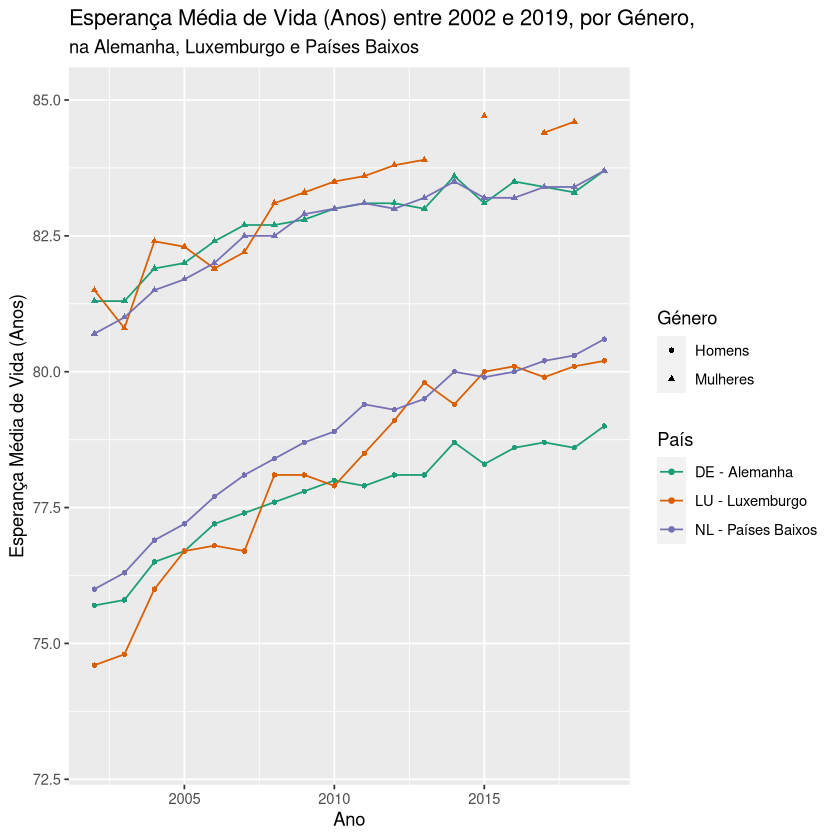

In [108]:
df[df$`country_code` %in% c("NL", "LU", "DE"), ] %>%
  filter(year >= 2002 & year <= 2019) %>%
  transform(esp_vida = ifelse(esp_vida == 0, NA, esp_vida)) %>%
  na.omit() %>%
  ggplot(aes(x = year, y = esp_vida, color = country_dn, shape = `type.2`)) +
  geom_line(na.rm = TRUE) +
  geom_point(size = 1.2, na.rm = TRUE) +
  scale_color_brewer(palette = "Dark2") +
  xlab("Ano") +
  ylab("Esperança Média de Vida (Anos)") +
  labs(color = "País", shape = "Género", subtitle = "na Alemanha, Luxemburgo e Países Baixos") +
  ggtitle("Esperança Média de Vida (Anos) entre 2002 e 2019, por Género,") +
  ylim(73, 85)

In [114]:
ggsave("output.svg", width = 25, height = 12, units = "cm")

Pelo gráfico temporal obtido, há uma clara distinção entre a esperança média de vida entre géneros: as mulheres têm valores superiores nos 3 países analizados.  
Reparamos também é que a tendência é crescente, isto é, a esperança média de vida aumenta ao longo do tempo.
Entre países, no mesmo género, há pouca diferença no valor da esperança média de vida: nos homens, a Alemanha tem um valor inferior tanto ao Luxemburgo como aos Países baixos; nas mulheres, o Luxemburgo tem um valor superior tanto à Alemanha como aos Países Baixos.